<a href="https://colab.research.google.com/github/ykitaguchi77/YOLACT_Mobius/blob/main/mobius_to_coco_suzuki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MobiusデータセットからCOCO-jsonへ変換

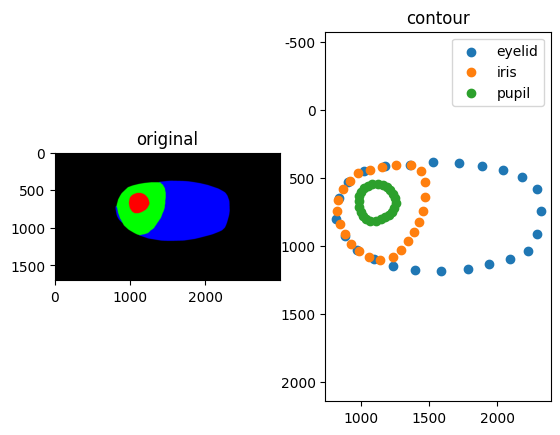

In [ ]:
import cv2
import numpy as np
import json
from skimage import measure
import os
from google.colab import drive
import matplotlib
from matplotlib import pyplot as plt


def create_mask(image, color):
    return np.all(image == color, axis=-1)


def apply_mask(image, mask):
    return np.where(mask, 255, 0)


def extract_contours(img, _num_points):
    contours = measure.find_contours(img, 0.5)
    points_list = []

    for contour in contours:
        contour_length = len(contour)

        if contour_length > _num_points:
            step = contour_length // _num_points
            selected_points = [contour[i * step] for i in range(_num_points)]
        else:
            selected_points = contour

        points = [[float(point[1]), float(point[0])] for point in selected_points]
        points_list.append(points)

    return points_list


def create_json(points_list_blue, points_list_blue_green, points_list_all_colors, json_name, img_path, img_data, img_height, img_width):
    data = {
        "version": "5.4.1",
        "flags": {},
        "shapes": [],
        "imagePath": img_path,
        "imageData": img_data,
        "imageHeight": img_height,
        "imageWidth": img_width
    }

    data["shapes"].append({
        "label": "eyelid",
        "points": points_list_all_colors,
        "group_id": None,
        "description": "",
        "shape_type": "polygon",
        "flags": {},
        "mask": None
    })

    data["shapes"].append({
        "label": "iris",
        "points": points_list_blue_green,
        "group_id": None,
        "description": "",
        "shape_type": "polygon",
        "flags": {},
        "mask": None
    })

    data["shapes"].append({
        "label": "pupil",
        "points": points_list_blue,
        "group_id": None,
        "description": "",
        "shape_type": "polygon",
        "flags": {},
        "mask": None
    })

    with open(json_name, 'w') as fw:
        json.dump(data, fw, indent=2)


def main(mask_file, json_name):
    img = cv2.imread(mask_file, cv2.IMREAD_COLOR)
    img_height, img_width = img.shape[:2]

    mask_blue = create_mask(img, [255, 0, 0])
    mask_green = create_mask(img, [0, 255, 0])
    mask_red = create_mask(img, [0, 0, 255])

    mask_blue_green = np.logical_or(mask_blue, mask_green)
    mask_all_colors = np.logical_or(mask_blue_green, mask_red)

    img_blue = apply_mask(img, mask_blue)
    img_blue_green = apply_mask(img, mask_blue_green)
    img_all_colors = apply_mask(img, mask_all_colors)

    points_list_blue = extract_contours(img_blue, num_points)
    points_list_blue_green = extract_contours(img_blue_green, num_points)
    points_list_all_colors = extract_contours(img_all_colors, num_points)

    create_json(points_list_blue, points_list_blue_green, points_list_all_colors, json_name, mask_file, "/9", img_height, img_width)

#マスクされた画像のパスを指定してください。
mask_file = "/content/1_3n_Rr_2.png"
json_name = "output.json"

#輪郭点の個数を指定してください。
num_points = 24

if __name__ == '__main__':
    main(mask_file, json_name)

# 元画像と輪郭の比較
matplotlib.rcParams['axes.unicode_minus'] = False
with open('/content/output.json') as f:
    data = json.load(f)

points_eyelid = []
points_iris = []
points_pupil = []
for shape in data['shapes']:
    if shape['label'] == 'eyelid':
        points_eyelid += shape['points'][0]
    elif shape['label'] == 'iris':
        points_iris += shape['points'][0]
    elif shape['label'] == 'pupil':
        points_pupil += shape['points'][0]


x_eyelid = [point[0] for point in points_eyelid]
y_eyelid = [point[1] for point in points_eyelid]

x_iris = [point[0] for point in points_iris]
y_iris = [point[1] for point in points_iris]

x_pupil = [point[0] for point in points_pupil]
y_pupil = [point[1] for point in points_pupil]

# 元の画像を読み込む
img_path = "/content/1_3n_Rr_2.png"
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

# 図の左隣に元の画像を表示する
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("original")

# 図の右隣に散布図を表示する
plt.subplot(1, 2, 2)
plt.scatter(x_eyelid, y_eyelid, label='eyelid')
plt.scatter(x_iris, y_iris, label='iris')
plt.scatter(x_pupil, y_pupil, label='pupil')
plt.title("contour")#輪郭

# 縦横の縮尺を同じにする
plt.axis('equal')

# 縦軸を降順にする
plt.gca().invert_yaxis()

# 凡例を表示する
plt.legend()

# 図を表示する
plt.show()


In [ ]:
!cat /content/output.json

{
  "version": "5.4.1",
  "flags": {},
  "shapes": [
    {
      "label": "eyelid",
      "points": [
        [
          [
            1584.0,
            1179.9980392156863
          ],
          [
            1397.0,
            1174.9980392156863
          ],
          [
            1233.0019607843137,
            1146.0
          ],
          [
            1092.0,
            1095.9980392156863
          ],
          [
            970.0,
            1025.9980392156863
          ],
          [
            877.0,
            926.9980392156863
          ],
          [
            811.0019607843137,
            800.0
          ],
          [
            833.0019607843137,
            646.0
          ],
          [
            905.0019607843137,
            526.0
          ],
          [
            1019.0019607843137,
            448.0
          ],
          [
            1176.0,
            412.0019607843137
          ],
          [
            1357.0,
            401.0019607843137
 

##質問

"imagePath": "/content/1_3n_Rr_2.png",
  "imageData": "/9",
  "imageHeight": 1700,
  "imageWidth": 3000
この箇所で,imageDataにbase64エンコードした画像を載せる必要はありますか？

In [ ]:
#保存する場合
#os.makedirs('/content/drive/MyDrive/AI_laboratory_course/YOLACT_Mobius_ocular_dataset/json/ex', exist_ok=True)
!cp output.json /content/drive/MyDrive/AI_laboratory_course/YOLACT_Mobius_ocular_dataset/json/ex/